# Classification Practices

Bu notebook, sınıflama modelleri için bir el kitabı olması amacıyla hazırlanmıştır. Teorik bilgi konusunda derinlemesine bir kavrayışta bulunulmamış, yalnızca uygulamalara ilişkin kısa bilgiler verilmiştir. Bu sebeple bu notebook'u kendi uygulamalarınız esnasında yönlendirici ve başvurulacak bir kaynak olarak görmeniz, her konsept için teorik altyapıyı oluşturduktan sonra uygulamaya geçmeniz tavsiye edilir.

Notebook içerisinde basit ve kompleks veri setleri kullanılmış olup, gerekli olduğu yerlerde pre-processing işlemlerine başvurulmuştur.

Hazırlayan: Mert Yasin Bozkır

- https://bento.me/mybozkir

## Kütüphaneler

In [40]:
# Import Libraries

#Regular Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

#Regression Metrics
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Classification Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score

#Regression Models
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# import lightgbm as lgb
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Preprocessing & Feature Engineering
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures

#Pipe & Hyperparameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Warnings
from warnings import filterwarnings
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = FutureWarning)

%matplotlib inline

## KNeighbors Classifier

İlk göreceğimiz sınıflama modeli K-Neighbors Classifier olacak.

Bu sınıflama modeli için bir K parametresi belirliyoruz, örneğin 5 olsun. Model, her gözlem için, gözleme en çok benzeyen 5 gözleme bakarak bu gözlemlerde en çok tekrar eden sınıfı bulur ve ilgili gözleme o sınıfı tahmin olarak atar.

In [41]:
df_ = pd.read_csv('../../datasets/classification/weight-height.csv')

df = df_.copy()

In [42]:
df

,Gender,Weight,Height
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


Sınıflama modellerine girişte, ilk kullanacağımız veri seti ağırlık ve uzunluk bilgilerine istinaden cinsiyetleri sınıflayacağımız bir veri seti olacak. Görebileceğimiz üzere 10000 adet gözlemden oluşuyor.

İlk olarak basitçe bu gözlemlerin dağılımlarına bakalım.

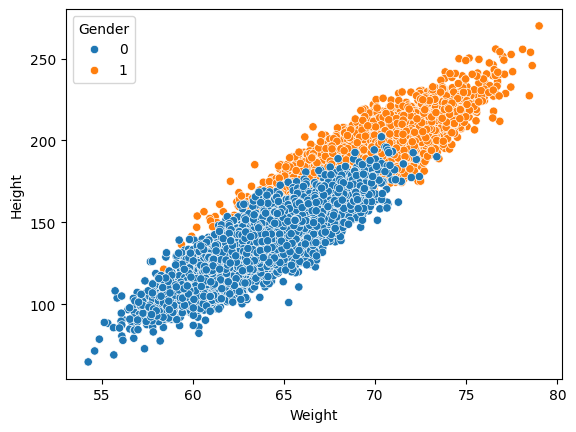

In [43]:
sns.scatterplot(data = df, x = 'Weight', y = 'Height', hue = 'Gender') ;

In [44]:
# X ve y olmak üzere model için gerekli setleri oluşturalım.

X = df.drop(columns = ['Gender'], axis = 1)

y = df['Gender']

In [45]:
# Train/Test ayrımını gerçekleştirelim.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Burada regresyon modelleri için yaptığımız ayrımdan farklı olarak stratify parametresine y değerini veriyoruz.
# Bu parametre, train ve test setlerindeki sınıf dağılımlarının tabakalı, yani homojen bir şekilde yapılmasını sağlar.
# Bu sayede öğrenme ve test süreci daha etkin gerçekleşir.

In [46]:
# KNN instance'ını oluşturalım ve modelimizi kuralım. Örneğin komşu değerini 5 verelim.
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Örneğin elimizde 85kg ve 185cm boyunda bir kişi olsun. Ek olarak 56kg ve 164cm boyunda bir kişi daha olsun.
# Bakalım modelimiz bu kişilerin cinsiyetlerini ne olarak tahmin edecek.

knn.predict([[85, 185], [56, 164]])

c:\Users\myboz\development\mybozkir\mybozkirenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

Modelimiz ikisini de erkek olarak tahminledi. Şimdi test seti ile tahmin işlemi gerçekleştirerek genel performansa bakalım.

In [48]:
y_pred = knn.predict(X_test)

In [49]:
# Şimdi Accuracy score'u görelim. Accuracy score, modelin toplamda % kaç isabetle tahmin yapabildiğini gösterir.
# Basitçe score methoduyla bunu görebiliriz. Bu methoda test setlerini verirsek kendisi fit işlemini yapıp skorlama yapar.

knn.score(X_test, y_test)

0.908

Modelimiz %90.8 isabetle doğru tahmin yapıyor. Yani her 1000 gözlemin 908 adedini doğru tahminlemiş.

Ancak bu genel skor bizim için her zaman istediğimiz bilgiyi vermeyebilir. Bunun ne demek olduğunu ilerleyen kısımda göreceğiz.

## Naive Bayes Classifier

Naive Bayes Classifier, en basit anlatımıyla bir gözlemin hangi sınıfa ait olabileceğine ilişkin olasılıkları Bayes teoremine uygulayarak çalışır. Buradaki Naive ifadesi, tahminleme için kullanılan her değişkenin birbirinden bağımsız (yani aralarında bir korelasyon olmadığını) olduğunu varsayıldığını gösterir.

In [50]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.891

## KNN & Naive Bayes | Diabetes Veri Seti

Bu bölümde Diabetes veri setini kullanarak her iki modelin performanslarını göreceğiz.

In [51]:
# Okuduğumuz dosyanın uzantısı bu sefer .csv değil, .txt. Bu sebeple read_table methodunu kullanıyoruz.
df_ = pd.read_table('../../datasets/classification/diabetesdata.txt')

df = df_.copy()

In [52]:
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
# X ve y setlerini ayıralım.

X = df.drop(columns = ['Diabetes'], axis = 1)

y = df['Diabetes']

In [54]:
# Train/Test Split yapalım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [55]:
# KNN modelimizi kuralım ve fit edelim.
knn = KNeighborsClassifier(n_neighbors = 5) 

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6688311688311688

In [56]:
# Peki ya 10 adet yakın komşuyla bir model kursaydık nasıl olacaktı?
knn = KNeighborsClassifier(n_neighbors = 10) 

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6818181818181818

In [57]:
# Şimdi 1'den 10'a kadar farklı komşu değerleriyle skorlama yapıp bu skorları karşılaştıralım.

neighbors = np.arange(3, 11).tolist() # Bu kısımda 3'ten 10'a kadar (10 dahil) bir range oluşturup liste formatında tutuyoruz.

scores = pd.DataFrame([], columns = ['Score']) # Elde ettiğimiz skorları bu DataFrame içerisinde tutacağız.

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)

    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)

    scores.loc[n] = score

scores = scores.sort_values(by = 'Score', ascending = False)
scores

,Score
4,0.727273
6,0.714286
8,0.707792
3,0.694805
9,0.688312
10,0.681818
7,0.675325
5,0.668831


Görebileceğimiz üzere en iyi komşu değerimiz 4 geldi.

Şimdi Naive Bayes ile skorlama yapalım.

In [58]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.7077922077922078

## Logistic Regression

Logistic Regression, e / (1 + e) şeklindeki lojistik fonksiyonda, e değerlerinin üslerine regresyon model kurarak sınıf çıktılarını 0 ve 1 arasında bir olasılık grafiğinde değerlendirerek tahmin işlemi yapar.

Lojistik fonksiyon ile regresyon denklemini birleştirdiğimiz için, yine değişkenlerin katsayılarını bulması gerekir. Her X değeri için bu kombinasyonla bir sınıf olasılığı türetir.

Örneğin 1 ve 0 sınıflarımız olduğunu varsayalım. Eğer varsayımsal olarak bizim için bir sınıfın 1 olması için gerekli olasılık eşiği %50'nin üstündeyse, bu değerin üstündeki her olasılık için 1 ataması yapılır. Bazı durumlarda bu eşiği yükseltmek veya azaltmak isteyebiliriz, bu durum mümkündür.

In [59]:
# max_iter parametresi maksimum iterasyon sayısını ifade eder. Bir kısıt oluşturmamak için yükselttik.
# Penalty parametresi ise L1, L2 veya bunların kombinasyonlarından oluşan elastic net ceza parametresidir. Henüz bunu görmedik, o yüzden detaya girmiyorum.

logreg = LogisticRegression(max_iter = 10000, penalty = None)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [60]:
# Herhangi bir modele ait bilgilere erişmek için aşağıdaki kodu kullanabilirsiniz. (Model isminin başına ? koymalısınız.)

# ?LogisticRegression

In [61]:
X.columns

Index(['Preg', 'Glucose', 'BP', 'SkinThick', 'Insul', 'BMI', 'DPF', 'Age'], dtype='object')

In [62]:
# Kurduğumuz modelde oluşturulan katsayılara bakalım. Bu katsayılar yukarıda bahsettiğimiz üzere Regresyon katsayılarıdır.

logreg.coef_

array([[ 0.11492053,  0.0369776 , -0.01113966,  0.0043881 , -0.00127346,
         0.09259596,  0.78571926,  0.01537891]])

In [64]:
#logreg.coef_ 2D bir çıktı döndüğü için shape'i düzeltmek adına .flatten() kullanıyoruz.

logreg_coeff = pd.DataFrame(logreg.coef_.flatten(), X.columns, columns = ['Coefficients'])

logreg_coeff

,Coefficients
Preg,0.114921
Glucose,0.036978
BP,-0.011140
SkinThick,0.004388
Insul,-0.001273
BMI,0.092596
DPF,0.785719
Age,0.015379


In [65]:
# Normalde skorlama işlemini aşağıdaki gibi yapıyorduk.
logreg.score(X_test, y_test)

0.7142857142857143

In [66]:
# Ancak bu skorlamayı (Accuracy) accuracy_score kullanarak da yapabiliriz. Farklı olarak buraya y_test ve y_pred değerlerini vermeniz gerekir.
y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)

0.7142857142857143